<a href="https://colab.research.google.com/github/jadhav-rakesh/ML/blob/main/ds2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load a preexisting sample dataset from the scikit-learn library

from sklearn import datasets

digits = datasets.load_digits()

features = digits.data
target = digits.target

features[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [6]:
#generate a dataset of simulated data for regression

from sklearn.datasets import make_regression

features, target, coefficients = make_regression(n_samples=100,
                                                 n_features=3,
                                                 n_informative=3, #n_informative determines the number of features that are used to generate the target vector.
                                                 n_targets=1,
                                                 noise=0.0,
                                                 coef=True,
                                                 random_state=42)

print("Features\n", features[:3])
print("Target Vector\n", target[:3])

Features
 [[ 0.85243333  0.18645431 -0.66178646]
 [-0.48536355 -0.77282521 -0.23681861]
 [-0.84679372  0.47323762 -0.07282891]]
Target Vector
 [ 57.50085105 -62.43054535 -51.50692142]


In [9]:
#generate a dataset of simulated data for classification

from sklearn.datasets import make_classification

features, target = make_classification(n_samples=100,
                                       n_features=3,
                                       n_informative=3,
                                       n_redundant=0,
                                       n_classes=2,
                                       weights=[.25, .75],
                                       random_state=42)

print("Feature Matrix\n", features[:3])
print("Target Vector\n", target[:3])

Feature Matrix
 [[-0.0550468  -0.07689964  1.01423611]
 [ 0.85772085  1.36799979  1.1599394 ]
 [-0.801402    0.11471707 -0.53470213]]
Target Vector
 [1 1 0]


In [10]:
#generate a dataset of simulated data for clustering

from sklearn.datasets import make_blobs

features, target = make_blobs(n_samples=100,
                              n_features=2,
                              centers=3,
                              cluster_std=0.5,
                              shuffle=True,
                              random_state=42)

print("Feature Matrix\n", features[:3])
print("Target Vector\n", target[:3])

Feature Matrix
 [[-7.30302405 -7.63753321]
 [ 5.04663744  1.35773753]
 [-2.74393482  9.28556615]]
Target Vector
 [2 1 0]


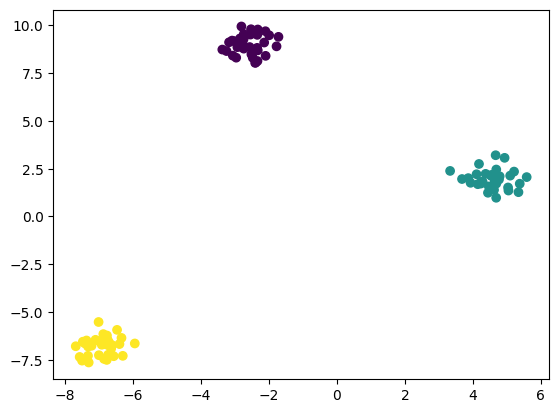

In [11]:
import matplotlib.pyplot as plt

plt.scatter(features[:,0], features[:,1], c=target)
plt.show()

In [13]:
#import a comma-separated value (CSV) file.
#read_csv has over 30 parameters
#parameters - sep, header

import pandas as pd

url = "https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.csv"

dataframe = pd.read_csv(url)

dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


In [14]:
# import an Excel spreadsheet

url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.xlsx'

dataframe = pd.read_excel(url, sheet_name=0, header=0)

dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


In [15]:
# load a JSON file for data preprocessing.
#orients values - (split, records, index, columns, or values)
#json_normalize

url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.json'

dataframe = pd.read_json(url, orient="columns")

dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


In [16]:
#load a Parquet file.

url = 'https://machine-learning-python-cookbook.s3.amazonaws.com/data.parquet'

dataframe = pd.read_parquet(url)

dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


In [18]:
!pip install pandavro

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 29.6 MB/s eta 0:00:00


In [19]:
#load an Avro file into a pandas DataFrame.
#large binary data formats such as Avro, thrift, and Protocol Buffers

import requests
import pandavro as pdx

url = "https://machine-learning-python-cookbook.s3.amazonaws.com/data.avro"

r = requests.get(url)
open("data.avro", 'wb').write(r.content)

dataframe  = pdx.read_avro("data.avro")

dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


In [ ]:
#load data from a database using structured query language (SQL).

from sqlalchemy import create_engine

database_connection = create_engine("sqlite:///sample.db")


dataframe = pd.read_sql_query('SELECT * FROM Chinook', database_connection)

dataframe.head(2)

In [30]:
!pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.8 MB/s eta 0:00:00


In [ ]:
#ou need to connect to, and read from, a remote SQL database.

import pymysql

conn = pymysql.Connect(
    host = "localhost",
    user = "root",
    password = "",
     db="db"
)

dataframe = pd.read_sql("select * from data", conn)

dataframe.head(2)

In [32]:
#read_CSV and pass a URL that exports the Google Sheet as a CSV
#/export?format=csv

url =  "https://docs.google.com/spreadsheets/d/"\
      "1ehC-9otcAuitqnmWksqt1mOrTRCL38dv0K9UjhwzTOA/export?format=csv"

dataframe = pd.read_csv(url)

dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 0:00:00,0
1,5,2015-01-01 0:00:01,0


In [ ]:
# read a CSV file from an S3 bucket you have access to.

s3_url = "s3://machine-learning-python-cookbook/data.csv"

## Set AWS credentials (replace with your own)
ACCESS_KEY_ID = "xxxxxxxxxxxxx"
SECRET_ACCESS_KEY = "xxxxxxxxxxxxxxxx"

dataframe = pd.read_csv(s3_url, storage_options={
    "key":ACCESS_KEY_ID,
    "secret":SECRET_ACCESS_KEY,
}
)

dataframe.head(2)

In [ ]:
#load unstructured data like text or images

txt_url = "https://machine-learning-python-cookbook.s3.amazonaws.com/text.txt"

r = requests.get(text_url)

with open("text.txt", "wb") as f:
    f.write(r.content)

with open("text.txt", "r") as f:
    text = f.read()

print(text)